In [2]:
import sys
sys.path.append('..')

import src.Auth as Auth
import utils.utils as utils
import numpy as np
import matplotlib.pyplot as plt


def pop_first_k_elements(arr, k):
    # Validate inputs
    if k < 0:
        raise ValueError("k must be non-negative")
    if k > len(arr):
        raise ValueError("k must not be greater than the number of elements in the array")
    
    return  arr[k:], arr[:k]


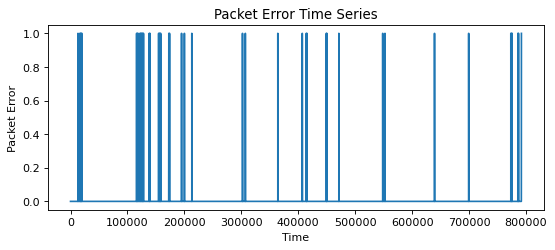

In [3]:
# one indicate packet lost, zero indicate correctly recieved packet
Packet_error = np.fromfile('time_series.csv', sep=',')
plt.figure(figsize=(8, 3), dpi=80)
plt.plot(Packet_error)
plt.title('Packet Error Time Series')
plt.xlabel('Time')
plt.ylabel('Packet Error')
plt.show()

In [3]:
def test_experiment(exp, Packet_error, m_size = 30, t_size = 256, b =None):
        i = 0
        cnt = 0
        security_rate = 0
        GP= 0
        while len(Packet_error) > exp['parameters']['m_nr']:
                Packet_error, m = pop_first_k_elements(Packet_error, exp['parameters']['m_nr'])
                m = np.power(0, m)
                # m = np.random.choice([0, 1], size=(exp['parameters']['m_nr'],), p=[0.1, 0.9])
                t = np.ones(exp['parameters']['t_nr'])
                # if 0 in m:
                val = Auth.Validate(exp,m, t)
                security_rate += Auth.SecurityRate(exp, m, t, t_size= t_size, b = b)
                GP += Auth.Goodput(exp, m, t, m_size, t_size= t_size)
                #count where m is 1 but val is zero
                cnt += sum(m)-sum(val>0)
                i+=1

        return {'received but failed to verify': cnt, 'security_rate': security_rate/i, 'GP': GP/i}

In [11]:
p = .9
experiments = utils.Load_Experiments('../Examples/Xs.pkl')
Packet_error = np.random.choice([0, 1], size=(100000,), p=[p, 1-p])
m_size = 256
t_size = 256
for exp in experiments:
        print('p: ', experiments[exp]['parameters']['p'],'q:  ', experiments[exp]['parameters']['q'], ',   m_nr: ', experiments[exp]['parameters']['m_nr'], ',   t_nr: ', experiments[exp]['parameters']['t_nr'])
        print(test_experiment(experiments[exp],
                              Packet_error, 
                              m_size, 
                              t_size = t_size if experiments[exp]['eval']['average_A']< 1 
                              else int(t_size/np.average(Auth.Validate(experiments[exp], np.array([p]*experiments[exp]['parameters']['m_nr']), np.ones(experiments[exp]['parameters']['t_nr'])))), 
                              b =t_size))

p:  0.95 q:   1 ,   m_nr:  25 ,   t_nr:  25
{'received but failed to verify': 41811, 'security_rate': 1.0166554529256997, 'GP': 0.3478791951508921}
p:  0.99 q:   1 ,   m_nr:  20 ,   t_nr:  5
{'received but failed to verify': 77983, 'security_rate': 0.9918507138927786, 'GP': 0.0854803486648895}
p:  0.99 q:   0.95 ,   m_nr:  20 ,   t_nr:  5
{'received but failed to verify': 77983, 'security_rate': 0.9918507138927786, 'GP': 0.0854803486648895}
p:  0.99 q:   0.9 ,   m_nr:  20 ,   t_nr:  5
{'received but failed to verify': 77983, 'security_rate': 0.9918507138927786, 'GP': 0.0854803486648895}
p:  0.95 q:   1 ,   m_nr:  20 ,   t_nr:  5
{'received but failed to verify': 77983, 'security_rate': 0.9918507138927786, 'GP': 0.0854803486648895}
p:  0.95 q:   0.95 ,   m_nr:  20 ,   t_nr:  5
{'received but failed to verify': 77983, 'security_rate': 0.9918507138927786, 'GP': 0.0854803486648895}
p:  0.95 q:   0.9 ,   m_nr:  20 ,   t_nr:  5
{'received but failed to verify': 77983, 'security_rate': 0.9918

In [12]:
parameters = {'m_nr':20, 't_nr': 20,
                'p': p, 'q': 1,
                'x': 1}
X = Auth.ProMAC_X(parameters['m_nr'],parameters['x'])
exp = Auth.Create_Experiment(parameters,X= X)

# Packet_error = np.fromfile('time_series2.csv', sep=',')
print(test_experiment(exp,Packet_error, m_size,t_size=t_size/parameters['x'], b= t_size))

Status: 1
Objective value: 20.0
{'received but failed to verify': 0, 'security_rate': 0.9006101220243939, 'GP': 0.45030506101219697}


In [6]:
parameters = {'m_nr':Auth.X.shape[0], 't_nr': Auth.X.shape[1],
                'p': p, 'q': 1,}
exp = Auth.Create_Experiment(parameters,X= Auth.X)
print(test_experiment(exp,Packet_error, m_size,t_size=t_size/2, b= t_size))


Status: 1
Objective value: 6.0
{'received but failed to verify': 6833, 'security_rate': 0.633108310831078, 'GP': 0.7606612089780928}


In [7]:
X = np.array([[1]]*3)
# identity matrix
# X = np.eye(10)
parameters = {'m_nr':X.shape[0], 't_nr': X.shape[1],
                'p': p, 'q': 1,}
exp = Auth.Create_Experiment(parameters,X= X)
print(test_experiment(exp,Packet_error, m_size,t_size=t_size, b= t_size))

Status: 1
Objective value: 1.0
{'received but failed to verify': 16891, 'security_rate': 0.7314073140731407, 'GP': 0.6501398347318729}


p:  0.75 q:   1 ,   m_nr:  20 ,   t_nr:  5
p:  0.8 q:   1 ,   m_nr:  20 ,   t_nr:  5
p:  0.7 q:   1 ,   m_nr:  20 ,   t_nr:  5
p:  0.95 q:   1 ,   m_nr:  20 ,   t_nr:  5
p:  0.85 q:   1 ,   m_nr:  20 ,   t_nr:  5
p:  0.9 q:   1 ,   m_nr:  20 ,   t_nr:  5
p:  0.95 q:   1 ,   m_nr:  20 ,   t_nr:  10
p:  0.75 q:   1 ,   m_nr:  20 ,   t_nr:  10
p:  0.85 q:   1 ,   m_nr:  20 ,   t_nr:  10
p:  0.8 q:   1 ,   m_nr:  20 ,   t_nr:  10
p:  0.9 q:   1 ,   m_nr:  20 ,   t_nr:  10
p:  0.7 q:   1 ,   m_nr:  20 ,   t_nr:  10
p:  0.95 q:   1 ,   m_nr:  20 ,   t_nr:  15
p:  0.75 q:   1 ,   m_nr:  20 ,   t_nr:  15
p:  0.8 q:   1 ,   m_nr:  20 ,   t_nr:  15
p:  0.7 q:   1 ,   m_nr:  20 ,   t_nr:  15
p:  0.9 q:   1 ,   m_nr:  20 ,   t_nr:  15
p:  0.85 q:   1 ,   m_nr:  20 ,   t_nr:  15
p:  0.85 q:   1 ,   m_nr:  30 ,   t_nr:  5
p:  0.8 q:   1 ,   m_nr:  30 ,   t_nr:  5
p:  0.75 q:   1 ,   m_nr:  30 ,   t_nr:  5
p:  0.7 q:   1 ,   m_nr:  30 ,   t_nr:  5
p:  0.9 q:   1 ,   m_nr:  30 ,   t_nr:  5
p:  0.95 q:

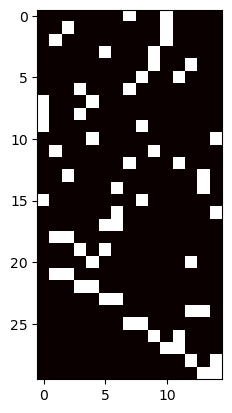

In [4]:
experiments = utils.Load_Experiments('../Examples/Xs.pkl')
for exp in experiments:
        print('p: ', experiments[exp]['parameters']['p'],'q:  ', experiments[exp]['parameters']['q'], ',   m_nr: ', experiments[exp]['parameters']['m_nr'], ',   t_nr: ', experiments[exp]['parameters']['t_nr'])
        plt.imshow(experiments[exp]['results']['X'], cmap='hot', interpolation='nearest')
        # plt.show()